<a href="https://colab.research.google.com/github/AmarnadhReddy055/Jigsaw-Multilabel-Toxic-Comment-Classification/blob/main/Multi_Label_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss
from sklearn import model_selection
from sklearn.metrics import log_loss
from scipy.sparse import csr_matrix

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
final_data=pd.read_csv('/content/drive/MyDrive/Toxic_comments_classification/final_toxic.csv')

In [ ]:
final_data.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,1,000103f0d9cfb60f,daww match background colour im seemingly stuc...,0,0,0,0,0,0
2,2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0
3,3,0001b41b1c6bb37e,cant make real suggestion improvement wondered...,0,0,0,0,0,0
4,4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0


In [ ]:
final_data.shape

(159571, 9)

In [ ]:
final_data.dropna(inplace=True)
final_data.drop_duplicates(inplace=True)

In [ ]:
final_data.shape

(159449, 9)

# Exploratory Data Analysis (EDA):

Counting number of comments in each label

In [ ]:
columns=list(final_data.columns[3:])

In [ ]:
values=list(final_data.iloc[:,3:].sum().values)

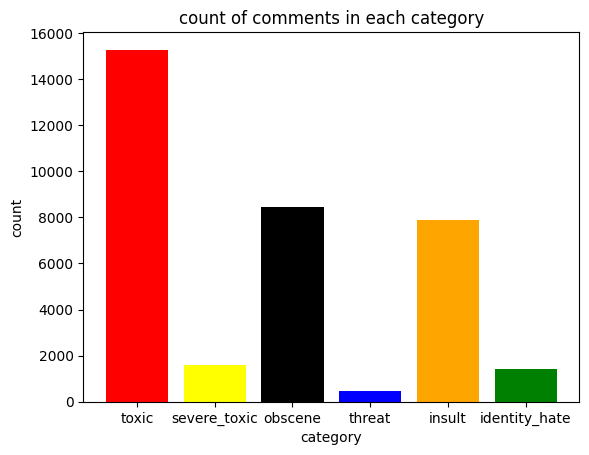

In [ ]:
c = ['red', 'yellow', 'black', 'blue', 'orange','green']
plt.bar(columns,values,color=c)
plt.title('count of comments in each category')
plt.xlabel('category')
plt.ylabel('count')
plt.savefig('plot.png')
plt.show()

counting number of comments which belongs to multiple label

In [ ]:
value=final_data.iloc[:,2:].sum(axis=1)

<ipython-input-13-fdedbff1a6cf>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  value=final_data.iloc[:,2:].sum(axis=1)


In [ ]:
labels_count=value.value_counts()

In [ ]:
labels_count=labels_count.iloc[1:]

In [ ]:
print(labels_count.index)

Int64Index([1, 3, 2, 4, 5, 6], dtype='int64')


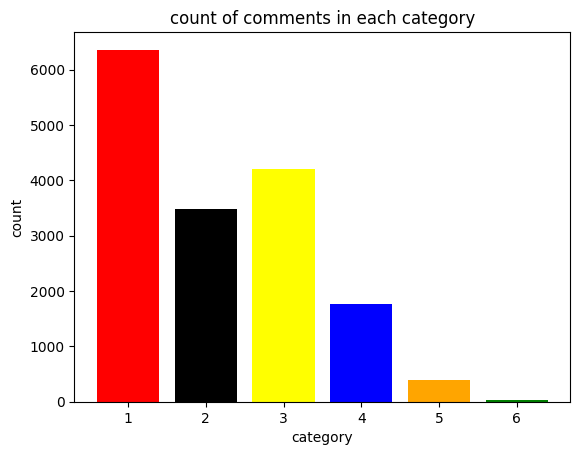

In [ ]:
c = ['red', 'yellow', 'black', 'blue', 'orange','green']
plt.bar(labels_count.index,labels_count,color=c)
plt.title('count of comments in each category')
plt.xlabel('category')
plt.ylabel('count')
plt.show()

# TF-IDF 

In [ ]:
from sklearn import model_selection,preprocessing
from sklearn.metrics import accuracy_score

In [ ]:
vectorizer=TfidfVectorizer(max_features=10000)
vectors=vectorizer.fit_transform(final_data['comment_text'])

In [ ]:
print(vectors.shape)

(159449, 10000)


In [ ]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(vectors,final_data.iloc[:,3:],test_size=0.4)

# Model Building

# Model1- Using Chain Classifier Logistic Regression

In [ ]:
pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 10.7 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from skmultilearn.problem_transform import ClassifierChain
from sklearn.multioutput import ClassifierChain

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
model1=ClassifierChain(LogisticRegression(max_iter=1000))
model1.fit(X_train,Y_train)

ClassifierChain(base_estimator=LogisticRegression(max_iter=1000))

In [ ]:
hamming_loss(model1.predict(X_test),Y_test)

0.01903679314309606

In [ ]:
log_loss(model1.predict(X_test),Y_test)

0.7807817950642254

In [ ]:
print(classification_report(model1.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.59      0.92      0.72      3917
 severe_toxic       0.20      0.57      0.29       205
      obscene       0.69      0.89      0.78      2589
       threat       0.10      0.58      0.17        31
       insult       0.61      0.74      0.67      2560
identity_hate       0.19      0.74      0.31       151

    micro avg       0.58      0.85      0.69      9453
    macro avg       0.40      0.74      0.49      9453
 weighted avg       0.61      0.85      0.70      9453
  samples avg       0.05      0.05      0.05      9453



# Model2- Using Binary Relavance Logistic Regression

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance

In [ ]:
model2=BinaryRelevance(LogisticRegression(max_iter=1000))
model2.fit(X_train,Y_train)

BinaryRelevance(classifier=LogisticRegression(max_iter=1000),
                require_dense=[True, True])

In [ ]:
hamming_loss(model2.predict(X_test),Y_test)

0.01950716002926727

In [ ]:
log_loss(model2.predict(X_test),Y_test)

0.5773022263484566

In [ ]:
print(classification_report(model2.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.59      0.92      0.72      3917
 severe_toxic       0.27      0.57      0.36       274
      obscene       0.62      0.92      0.74      2246
       threat       0.09      0.55      0.15        29
       insult       0.50      0.82      0.62      1899
identity_hate       0.16      0.66      0.25       138

    micro avg       0.54      0.88      0.67      8503
    macro avg       0.37      0.74      0.47      8503
 weighted avg       0.56      0.88      0.68      8503
  samples avg       0.05      0.05      0.05      8503



# Model3-Classifier Chain Method using NaiveBayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
model3=ClassifierChain(MultinomialNB())
model3.fit(X_train,Y_train)

ClassifierChain(base_estimator=MultinomialNB())

In [ ]:
hamming_loss(model3.predict(X_test),Y_test)

0.023264868819901745

In [ ]:
log_loss(model3.predict(X_test),Y_test)

1.495204635353924

In [ ]:
print(classification_report(model3.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.49      0.93      0.65      3221
 severe_toxic       0.19      0.52      0.28       220
      obscene       0.70      0.75      0.72      3135
       threat       0.00      0.00      0.00         4
       insult       0.68      0.67      0.68      3135
identity_hate       0.41      0.27      0.33       898

    micro avg       0.56      0.74      0.64     10613
    macro avg       0.41      0.52      0.44     10613
 weighted avg       0.60      0.74      0.64     10613
  samples avg       0.04      0.04      0.04     10613



# Model4- BinaryRelevance using  NaiveBayes

In [ ]:
model4=BinaryRelevance(MultinomialNB())
model4.fit(X_train,Y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [ ]:
hamming_loss(model4.predict(X_test),Y_test)

0.022478310860248773

In [ ]:
log_loss(model4.predict(X_test),Y_test)

0.3602830753079732

In [ ]:
print(classification_report(model4.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.49      0.93      0.65      3221
 severe_toxic       0.06      0.65      0.11        52
      obscene       0.49      0.91      0.64      1806
       threat       0.00      0.00      0.00         2
       insult       0.40      0.84      0.54      1463
identity_hate       0.01      0.50      0.02        12

    micro avg       0.43      0.91      0.58      6556
    macro avg       0.24      0.64      0.33      6556
 weighted avg       0.47      0.91      0.62      6556
  samples avg       0.03      0.05      0.04      6556



# Model5- Using ChainClassifier SVM

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
model5=ClassifierChain(LinearSVC())

In [ ]:
model5.fit(X_train,Y_train)

ClassifierChain(base_estimator=LinearSVC())

In [ ]:
hamming_loss(model5.predict(X_test),Y_test)

0.018934880317758963

In [ ]:
log_loss(model5.predict(X_test),Y_test)

0.9831637429480962

In [ ]:
print(classification_report(model5.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.67      0.86      0.75      4757
 severe_toxic       0.26      0.50      0.34       312
      obscene       0.72      0.85      0.78      2811
       threat       0.21      0.56      0.31        71
       insult       0.62      0.72      0.67      2707
identity_hate       0.26      0.65      0.37       234

    micro avg       0.63      0.81      0.71     10892
    macro avg       0.46      0.69      0.54     10892
 weighted avg       0.65      0.81      0.72     10892
  samples avg       0.06      0.06      0.05     10892



# Model6-BinaryRelevance using SVM

In [ ]:
model6=BinaryRelevance(LinearSVC())

In [ ]:
model6.fit(X_train,Y_train)

BinaryRelevance(classifier=LinearSVC(), require_dense=[True, True])

In [ ]:
hamming_loss(model6.predict(X_test),Y_test)

0.018629141841747673

In [ ]:
log_loss(model6.predict(X_test),Y_test)

0.7977487609000758

In [ ]:
print(classification_report(model6.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.67      0.86      0.75      4757
 severe_toxic       0.27      0.54      0.36       299
      obscene       0.70      0.88      0.78      2672
       threat       0.18      0.55      0.27        62
       insult       0.57      0.78      0.66      2300
identity_hate       0.24      0.63      0.35       221

    micro avg       0.61      0.83      0.71     10311
    macro avg       0.44      0.71      0.53     10311
 weighted avg       0.63      0.83      0.72     10311
  samples avg       0.05      0.06      0.05     10311



# Model7- Using Multioutput Classifier  XGBOOST(Tree ensembles)

In [ ]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
model7=MultiOutputClassifier(estimator=XGBClassifier())

In [ ]:
model7.fit(X_train,Y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))

In [ ]:
log_loss(model7.predict(X_test),Y_test)

0.7245212500023912

In [ ]:
hamming_loss(model7.predict(X_test),Y_test)

0.019368663112783527

In [ ]:
print(classification_report(model7.predict(X_test),Y_test,target_names=columns,zero_division=0))

               precision    recall  f1-score   support

        toxic       0.58      0.90      0.70      3929
 severe_toxic       0.19      0.47      0.28       244
      obscene       0.70      0.89      0.78      2644
       threat       0.18      0.53      0.27        64
       insult       0.54      0.80      0.65      2139
identity_hate       0.27      0.68      0.39       234

    micro avg       0.57      0.85      0.68      9254
    macro avg       0.41      0.71      0.51      9254
 weighted avg       0.59      0.85      0.69      9254
  samples avg       0.05      0.05      0.05      9254



# Predication Value

In [ ]:
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmatizer=WordNetLemmatizer()
stop_words=stopwords.words('english')

In [ ]:
def predict_toxicity(text):
  text=text.lower()
    #statement1-removing special characters and Punctuation
  sentence=re.sub(r'[^\w\s]','',text)
    #statement2-removing numbers from text
  sentence=re.sub(r'[0-9]+','',sentence)
    #statement3-removing html tags and urls from text
  sentence = re.sub(r'<.*?>', '', sentence)
    #statement4-removing urls from text
  clean_text = re.sub(r'http\S+', '',sentence)
    #statement5-text to word tokenization
  sentence=nltk.word_tokenize(clean_text)
    #statement6-removing stop_words
  i=0
  while i<10:
    sentence = [word for word in sentence if word.lower() not in stop_words]
    i=i+1
  lst=[]
   #statement7-lemmatization
  for word in sentence:
    lst.append(lemmatizer.lemmatize(word))
  #statement8-joing words to form sentence
  cleaned_text=' '.join(lst)
  return model1.predict(vectorizer.transform([cleaned_text]))

In [ ]:
columns

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [ ]:
predict_toxicity('she is bitch')

array([[1., 0., 1., 0., 1., 0.]])